Шаг 1.  Изучите материалы лекционных и практических занятий по теме 7.2-7.3.

Шаг 2. Создайте программу, загружающую данные с файла (Алгоритм выполнения представлен в лекции по теме 7.3).

Шаг 3. Выполните задачу классификации (деревья решений, случайный лес, логистическая регрессия, метод опорных векторов) и кластерный анализ (Алгоритм выполнения представлен в лекции  по теме 7.3).

Шаг 4. Визуализируйте полученные результаты классификации (где возможно) и кластерного анализа (Алгоритм выполнения представлен в лекции по теме 7.3).

Шаг 5. Постройте модель прогноза. Проведите обучение модели (Алгоритм выполнения представлен в лекции по теме 7.3).

Шаг 6. Выполнить оценку модели (Алгоритм выполнения представлен в лекции по теме 7.3).

Шаг 7. Опубликуйте файл расширения ipynb, прикрепив его в этом задании.

В задании предполагается, что акцент делается на решение задач классификации и кластеризации.

**Задача классификации**

Имеется клиентская база телекоммуникационной компании. По каждому клиенту известен набор признаков, соответствующих используемым услугам компании и известно ушел клиент (`Да`) или остался (`Нет`). Постройте модель для прогноза ухода клиента.

Описание набора `classification_phone.csv` -- для классификации

|Признак|Комментарий|
|--:|:--|
|`Phone_number`|Номер телефона |
|`International_calls`|Международные звонки| 
|`Voice_mail`|Голосовая почта|
|`Number_of_voicemails`|Количество голосовых  сообщений|
|`Daytime_minutes_used`|Использовано дневных минут|
|`Number_of_calls_during_the_day`|Количество звонков днем|
|`Monthly fee`|Дневная абонентская плата|
|`Used_evening_minutes`|Использовано вечерних минут|
|`Number_of_calls_in_the_evening`|Количество звонков вечером|
|`Subscription_fee_in_the_evening`|Вечерная абонентская плата|
|`Using_night_minutes`|Использование ночных минут|
|`Number_of_night_calls`|Количество ночных звонков|
|`Nightly_subscription_fee`|Ночная абонентская плата|
|`Minutes_of_long_distance_calls`|Минут междугородних разговоров|
|`Number_of_international_calls`|Число международных звонков|
|`Subscription_fee_for_international_calls`|Абонентская плата|
|`The_number_of_calls_to_the_service_department`|Число обращений в сервисную службу| 
|`churn`|Уход|

**Задача кластеризации**

Имеется клиентская база телекоммуникационной компании. По каждому клиенту известен набор признаков, соответствующих используемым услугам компании. Требуется построить профили клиентов компании.

Описание набора `cluster_phone.csv` -- для кластеризации

|Признак|Комментарий|
|--:|:--|
|`Phone_number`|Номер телефона |
|`International_calls`|Международные звонки| 
|`Voice_mail`|Голосовая почта|
|`Number_of_voicemails`|Количество голосовых  сообщений|
|`Daytime_minutes_used`|Использовано дневных минут|
|`Number_of_calls_during_the_day`|Количество звонков днем|
|`Monthly fee`|Дневная абонентская плата|
|`Used_evening_minutes`|Использовано вечерних минут|
|`Number_of_calls_in_the_evening`|Количество звонков вечером|
|`Subscription_fee_in_the_evening`|Вечерная абонентская плата|
|`Using_night_minutes`|Использование ночных минут|
|`Number_of_night_calls`|Количество ночных звонков|
|`Nightly_subscription_fee`|Ночная абонентская плата|
|`Minutes_of_long_distance_calls`|Минут междугородних разговоров|
|`Number_of_international_calls`|Число международных звонков|
|`Subscription_fee_for_international_calls`|Абонентская плата|
|`The_number_of_calls_to_the_service_department`|Число обращений в сервисную службу| 

**Задание №1. Задача классификации. файл:`classification_phone.csv`**

In [3]:
# загружаем все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from sklearn.tree import DecisionTreeClassifier, plot_tree # дерево решений
from sklearn.ensemble import RandomForestClassifier #случайный лес
from sklearn.linear_model import LogisticRegression # логистическая регресси
from sklearn.svm import SVC # метод опорных векторов
from sklearn.linear_model import SGDClassifier # стохастический градиентный спуск

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [4]:
# подключаем файл
df = pd.read_csv('classification_phone.csv')
df.head()

,Phone_number,International_calls,Voice_mail,Number_of_voicemails,Daytime_minutes_used,Number_of_calls_during_the_day,Monthly fee,Used_evening_minutes,Number_of_calls_in_the_evening,Subscription_fee_in_the_evening,Using_night_minutes,Number_of_night_calls,Nightly_subscription_fee,Minutes_of_long_distance_calls,Number_of_international_calls,Subscription_fee_for_international_calls,The_number_of_calls_to_the_service_department,churn
0,382-4657,нет,да,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,Нет
1,371-7191,нет,да,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,Нет
2,358-1921,нет,нет,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,Нет
3,375-9999,да,нет,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,Нет
4,330-6626,да,нет,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,Нет


In [5]:
# преобразуем нужный столбец в числовой и удаляем ненужные столбцы
l_e = LabelEncoder()
l_e.fit(df['churn'])
df['churn_n'] = l_e.transform(df['churn'])
df = df.drop(columns = ['Phone_number', 'International_calls', 'Voice_mail', 'churn'])
df.head()

,Number_of_voicemails,Daytime_minutes_used,Number_of_calls_during_the_day,Monthly fee,Used_evening_minutes,Number_of_calls_in_the_evening,Subscription_fee_in_the_evening,Using_night_minutes,Number_of_night_calls,Nightly_subscription_fee,Minutes_of_long_distance_calls,Number_of_international_calls,Subscription_fee_for_international_calls,The_number_of_calls_to_the_service_department,churn_n
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1


In [6]:
# разбиваем на обучающую и тестовую выборку
X = df.drop(columns = 'churn_n')
y = df.churn_n
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [7]:
# нормализируем, оцениваем, обучаем, трансформируем
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [8]:
# классифицируем, прогнозируем и оцениваем качество

# Деревья решений
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train_std, y_train)
dt_y_pred = dt.predict(X_test_std)
# Случайный лес 
rnd = RandomForestClassifier(random_state=0 )
rnd.fit(X_train_std, y_train)
rnd_y_pred = rnd.predict(X_test_std)
# Логистическая регрессия
lr = LogisticRegression(random_state=0)
lr.fit(X_train_std, y_train)
lr_y_pred = lr.predict(X_test_std)
# Метод опорных векторов
svc = SVC(random_state=0)
svc.fit(X_train_std, y_train)
svc_y_pred = svc.predict(X_test_std)

In [9]:
# по моему мнению модель 'Случайный лес' показывает наилучший результат!

print("Оценка модели обучения 'Деревья решений'".format(accuracy_score(y_test, dt_y_pred)))
print("Аккуратность (accuracy) = {}".format(accuracy_score(y_test, dt_y_pred)))
print("Точность (precision) = {}".format(precision_score(y_test, dt_y_pred)))
print("Полнота (recall) = {}".format(recall_score(y_test, dt_y_pred)))
print("F-мера (f-score) = {}".format(f1_score(y_test, dt_y_pred)))
print('------------------------------------------------')
print("Оценка модели обучения 'Случайный лес'".format(accuracy_score(y_test, rnd_y_pred)))
print("Аккуратность (accuracy) = {}".format(accuracy_score(y_test, rnd_y_pred)))
print("Точность (precision) = {}".format(precision_score(y_test, rnd_y_pred)))
print("Полнота (recall) = {}".format(recall_score(y_test, rnd_y_pred)))
print("F-мера (f-score) = {}".format(f1_score(y_test, rnd_y_pred)))
print('------------------------------------------------')
print("Оценка модели обучения 'Логистическая регрессия'".format(accuracy_score(y_test, lr_y_pred)))
print("Аккуратность (accuracy) = {}".format(accuracy_score(y_test, lr_y_pred)))
print("Точность (precision) = {}".format(precision_score(y_test, lr_y_pred)))
print("Полнота (recall) = {}".format(recall_score(y_test, lr_y_pred)))
print("F-мера (f-score) = {}".format(f1_score(y_test, lr_y_pred)))
print('------------------------------------------------')
print("Оценка модели обучения 'Метод опорных векторов'".format(accuracy_score(y_test, svc_y_pred)))
print("Аккуратность (accuracy) = {}".format(accuracy_score(y_test, svc_y_pred)))
print("Точность (precision) = {}".format(precision_score(y_test, svc_y_pred)))
print("Полнота (recall) = {}".format(recall_score(y_test, svc_y_pred)))
print("F-мера (f-score) = {}".format(f1_score(y_test, svc_y_pred)))

Оценка модели обучения 'Деревья решений'
Аккуратность (accuracy) = 0.863
Точность (precision) = 0.9275534441805225
Полнота (recall) = 0.911318553092182
F-мера (f-score) = 0.9193643319599765
------------------------------------------------
Оценка модели обучения 'Случайный лес'
Аккуратность (accuracy) = 0.921
Точность (precision) = 0.9219088937093276
Полнота (recall) = 0.9918319719953326
F-мера (f-score) = 0.9555930297920181
------------------------------------------------
Оценка модели обучения 'Логистическая регрессия'
Аккуратность (accuracy) = 0.862
Точность (precision) = 0.8664627930682977
Полнота (recall) = 0.9918319719953326
F-мера (f-score) = 0.924918389553863
------------------------------------------------
Оценка модели обучения 'Метод опорных векторов'
Аккуратность (accuracy) = 0.905
Точность (precision) = 0.9027484143763214
Полнота (recall) = 0.9964994165694282
F-мера (f-score) = 0.947310038824182


**Задание №2. Задача кластеризации. файл:`cluster_phone.csv`**

In [10]:
# загружаем все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from sklearn.tree import DecisionTreeClassifier, plot_tree # дерево решений
from sklearn.ensemble import RandomForestClassifier #случайный лес
from sklearn.linear_model import LogisticRegression # логистическая регресси
from sklearn.svm import SVC # метод опорных векторов
from sklearn.linear_model import SGDClassifier # стохастический градиентный спуск

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import classification_report

In [11]:
# подключаем файл
df = pd.read_csv('cluster_phone.csv')
df.head()

,Phone_number,International_calls,Voice_mail,Number_of_voicemails,Daytime_minutes_used,Number_of_calls_during_the_day,Monthly fee,Used_evening_minutes,Number_of_calls_in_the_evening,Subscription_fee_in_the_evening,Using_night_minutes,Number_of_night_calls,Nightly_subscription_fee,Minutes_of_long_distance_calls,Number_of_international_calls,Subscription_fee_for_international_calls,The_number_of_calls_to_the_service_department
0,382-4657,нет,да,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,371-7191,нет,да,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,358-1921,нет,нет,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,375-9999,да,нет,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,330-6626,да,нет,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [12]:
# преобразуем нужные столбцы в числовой и удаляем ненужный столбец
df_clast = df.drop(columns = 'Phone_number')
df_clast = pd.get_dummies(df_clast)
df_clast.head()

,Number_of_voicemails,Daytime_minutes_used,Number_of_calls_during_the_day,Monthly fee,Used_evening_minutes,Number_of_calls_in_the_evening,Subscription_fee_in_the_evening,Using_night_minutes,Number_of_night_calls,Nightly_subscription_fee,Minutes_of_long_distance_calls,Number_of_international_calls,Subscription_fee_for_international_calls,The_number_of_calls_to_the_service_department,International_calls_да,International_calls_нет,Voice_mail_да,Voice_mail_нет
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,1,0
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,1,0
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1,0,1
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0,0,1
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0,0,1


In [13]:
# нормализуем
scaler = StandardScaler()
scaler.fit(df_clast)
df_fit= scaler.transform(df_clast)

In [14]:
#выполняем кластеризацию, пробуем разные методы и метрики. Оцениваем
mergings_ward = linkage(df_fit, method='ward')
mergings_single = linkage(df_fit, method='single')
mergings_single_hamming = linkage(df_fit, method='single', metric = 'hamming')
mergings_complete = linkage(df_fit, method='complete')
mergings_complete_hamming = linkage(df_fit, method='complete', metric = 'hamming')
mergings_complete_cosine = linkage(df_fit, method='complete', metric = 'cosine')
mergings_average = linkage(df_fit, method='average')
mergings_average_cosine = linkage(df_fit, method='average', metric = 'cosine')
mergings_average_sqeuclidean = linkage(df_fit, method='average', metric = 'sqeuclidean')

c, coph_dists = cophenet(mergings_ward, pdist(df_fit))
qual_mergings_ward = c
c, coph_dists = cophenet(mergings_single, pdist(df_fit))
qual_mergings_single = c
c, coph_dists = cophenet(mergings_single_hamming, pdist(df_fit))
qual_mergings_single_hamming = c
c, coph_dists = cophenet(mergings_complete, pdist(df_fit))
qual_mergings_complete = c
c, coph_dists = cophenet(mergings_complete_hamming, pdist(df_fit))
qual_mergings_complete_hamming = c
c, coph_dists = cophenet(mergings_complete_cosine, pdist(df_fit))
qual_mergings_complete_cosine = c
c, coph_dists = cophenet(mergings_average, pdist(df_fit))
qual_mergings_average = c
c, coph_dists = cophenet(mergings_average_cosine, pdist(df_fit))
qual_mergings_average_cosine = c
c, coph_dists = cophenet(mergings_average_sqeuclidean, pdist(df_fit))
qual_mergings_average_sqeuclidean = c

In [15]:
# по моему мнению самое высокое качество дал метод 'mergings_average'
print("Качество                'mergings_ward' - {}".format(qual_mergings_ward))
print("Качество              'mergings_single' - {}".format(qual_mergings_single))
print("Качество      'mergings_single_hamming' - {}".format(qual_mergings_single_hamming))
print("Качество            'mergings_complete' - {}".format(qual_mergings_complete))
print("Качество    'mergings_complete_hamming' - {}".format(qual_mergings_complete_hamming))
print("Качество     'mergings_complete_cosine' - {}".format(qual_mergings_complete_cosine))
print("Качество             'mergings_average' - {}".format(qual_mergings_average))
print("Качество      'mergings_average_cosine' - {}".format(qual_mergings_average_cosine))
print("Качество 'mergings_average_sqeuclidean' - {}".format(qual_mergings_average_sqeuclidean))

Качество                'mergings_ward' - 0.5669035722615284
Качество              'mergings_single' - 0.7030842343373311
Качество      'mergings_single_hamming' - 0.48108465397048567
Качество            'mergings_complete' - 0.47219579656822847
Качество    'mergings_complete_hamming' - 0.5128207977840779
Качество     'mergings_complete_cosine' - 0.3067236936261206
Качество             'mergings_average' - 0.7192758615640868
Качество      'mergings_average_cosine' - 0.5059498997334468
Качество 'mergings_average_sqeuclidean' - 0.7080113136181839


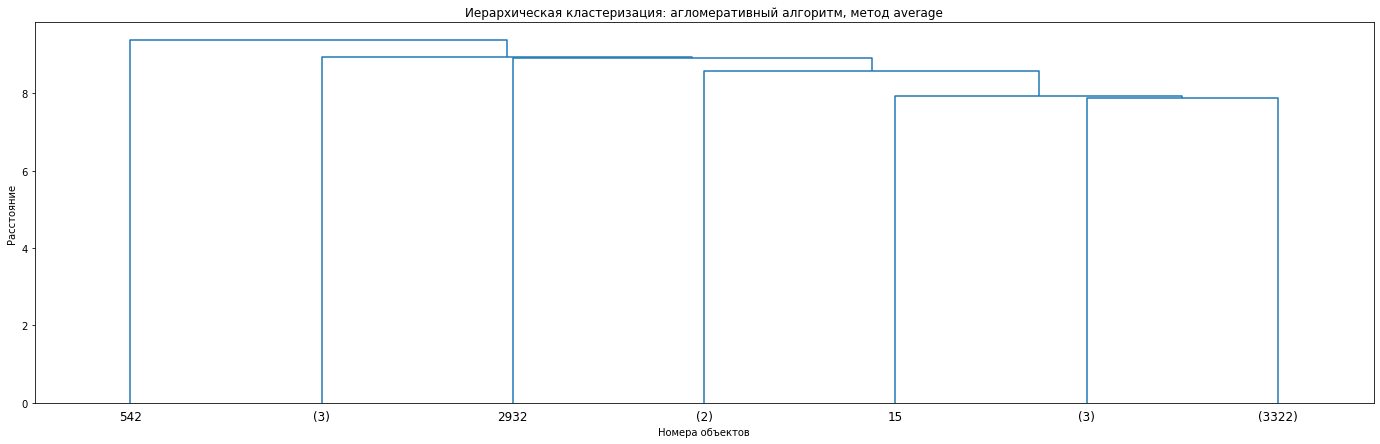

In [16]:
# строим дендрограмму для метода 'mergings_average'
plt.figure(figsize=(24,7))
dendrogram(mergings_average,
           p = 7,
           truncate_mode = 'lastp',
           leaf_rotation = 0,
           leaf_font_size = 12)
plt.title('Иерархическая кластеризация: агломеративный алгоритм, метод average')
plt.ylabel('Расстояние')
plt.xlabel('Номера объектов')
plt.show()

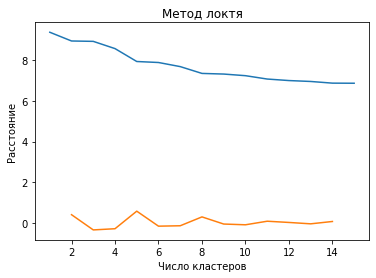

clusters: 5


In [17]:
# определяем оптимальную структуру разбиения
last = mergings_average[-15:, 2] # в матрице связей берем последние 15 значений расстояний между кластерами
last_rev = last[::-1] #переписываем в обратном порядке
idxs = np.arange(1, len(last) + 1,1) #генерируем список начальное значение 1, конечное --- число элементов массива, шаг 1
plt.xlabel('Число кластеров')
plt.ylabel('Расстояние')
plt.title('Метод локтя')
plt.plot(idxs, last_rev) #отображение графика

#далее идет расчет вторых разностей
acceleration = np.diff(last, 2) #расчет вторых разностей
acceleration_rev = acceleration[::-1] #переписываем в обратном порядке
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2
print("clusters:", k)

In [ ]:
# в нашем случае это 5 кластеров
label=fcluster(mergings_average, 5, criterion='maxclust')
df.loc[:,'Номер кластера mergings_average'] = label # добавление нового столбца с метками
df.head()

In [ ]:
# смотрим разрядность кластеров
df.groupby('Номер кластера mergings_average')\
    .agg(Размерность_кластера = ('Номер кластера mergings_average', 'count'))\
    .reset_index()\
    .sort_values(by = 'Размерность_кластера', ascending=False)

In [ ]:
# метод mergings_average оказался малоинформативным

In [ ]:
# в качестве альтернативы данной кластеризации воспользуемся методом ward
plt.figure(figsize=(24,7))
dendrogram(mergings_ward,
           p = 7,
           truncate_mode = 'lastp',
           leaf_rotation = 0,
           leaf_font_size = 12)
plt.title('Иерархическая кластеризация: агломеративный алгоритм, метод average')
plt.ylabel('Расстояние')
plt.xlabel('Номера объектов')
plt.show()

In [ ]:
# определяем оптимальную структуру разбиения
last = mergings_ward[-15:, 2] # в матрице связей берем последние 15 значений расстояний между кластерами
last_rev = last[::-1] #переписываем в обратном порядке
idxs = np.arange(1, len(last) + 1,1) #генерируем список начальное значение 1, конечное --- число элементов массива, шаг 1
plt.xlabel('Число кластеров')
plt.ylabel('Расстояние')
plt.title('Метод локтя')
plt.plot(idxs, last_rev) #отображение графика

#далее идет расчет вторых разностей
acceleration = np.diff(last, 2) #расчет вторых разностей
acceleration_rev = acceleration[::-1] #переписываем в обратном порядке
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2
print("clusters:", k)

In [ ]:
# в данном случае это 3 кластера
label=fcluster(mergings_ward, 3, criterion='maxclust')
df.loc[:,'Номер кластера mergings_ward'] = label # добавление нового столбца с метками
df.head()

In [21]:
# в данном случае это 3 кластера
label=fcluster(mergings_ward, 3, criterion='maxclust')
df.loc[:,'Номер кластера mergings_ward'] = label # добавление нового столбца с метками
df.head()

,Phone_number,International_calls,Voice_mail,Number_of_voicemails,Daytime_minutes_used,Number_of_calls_during_the_day,Monthly fee,Used_evening_minutes,Number_of_calls_in_the_evening,Subscription_fee_in_the_evening,Using_night_minutes,Number_of_night_calls,Nightly_subscription_fee,Minutes_of_long_distance_calls,Number_of_international_calls,Subscription_fee_for_international_calls,The_number_of_calls_to_the_service_department,Номер кластера mergings_average,Номер кластера mergings_ward
0,382-4657,нет,да,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,3,1
1,371-7191,нет,да,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,3,1
2,358-1921,нет,нет,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,3,3
3,375-9999,да,нет,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,3,2
4,330-6626,да,нет,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,3,2


In [22]:
# смотрим разрядность кластеров
df.groupby('Номер кластера mergings_ward')\
    .agg(Размерность_кластера = ('Номер кластера mergings_ward', 'count'))\
    .reset_index()\
    .sort_values(by = 'Размерность_кластера', ascending=False)

,Номер кластера mergings_ward,Размерность_кластера
2,3,2180
0,1,830
1,2,323
